## FALL2023 AIN212 Course Project: Free Palestine
#### Talha Kaba - 2210765037
#### Abdulkadir Parlak - 2210765025
### Dataset: Fatalities in the Israeli-Palestinian Conflict
* source: https://www.kaggle.com/datasets/willianoliveiragibin/fatalities-in-the-israeli-palestinian

In [370]:
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler

import warnings
warnings.filterwarnings("ignore")

# Step 1: Data Collection
In this section data has been collected from the source.

In [371]:
url = 'https://drive.google.com/file/d/1cY8f0xSCuX_-P0rRf8gPW7eJ1RISRzUc/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

print("Number of rows:", len(df))
print("Number of columns:", len(df.columns))

df.head(10)

Number of rows: 11124
Number of columns: 16


,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...
5,'Ata Yasser 'Ata Musa,2023-09-19,29.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-20,M,NaN,Jenin,Jenin,gunfire,missile,Israeli security forces,Wounded by shrapnel from a missile fired by Is...
6,Yusef Salem Yusef Radwan,2023-09-19,24.0,Palestinian,Gaza City,Gaza,Gaza Strip,2023-09-19,M,No,Khan Yunis,Khan Yunis,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while participating i...
7,Mahmoud Khaled S'ud 'Ar'arawi,2023-09-19,25.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin R.C.,Jenin,gunfire,missile,Israeli security forces,Wounded by shrapnel from a missile fired by Is...
8,Mahmoud 'Ali Nafe'a a-S'adi,2023-09-19,23.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin R.C.,Jenin,gunfire,missile,Israeli security forces,Wounded by shrapnel from a missile fired by Is...
9,Milad Munzer Wajih a-Ra'i,2023-09-09,15.0,Palestinian,al-'Arrub R.C.,Hebron,West Bank,2023-09-09,M,NaN,al-'Arrub Camp,Hebron,gunfire,live ammunition,Israeli security forces,Fatally shot by a soldier after throwing two M...


# Overview of the Attributes of the Dataset:
*Here are the descriptions of the attributes from the dataset:*<br>
**name :** the name of the people killed<br>
**date_of_event :** the date of the fatality, format: YYYY-MM-DD,  # of distinct dates 2405<br>
**age :** the age of the person killed, range: [1:112]<br>
**citizenship :** the nationality of the person killed, types: ['Palestinian' 'Israeli' 'Jordanian' 'American']<br>
**event_location :** the location of the fatality, number of distinct locations = 494<br>
**event_location_district :** the district location of the fatality<br>
**event_location_region :** the region of the fatality, types: ['West Bank' 'Gaza Strip' 'Israel']<br>
**date_of_death :** the date of the death of the victim, format: YYYY-MM-DD,  # of distinct dates 2593<br>
**gender :** the gender of the person killed<br>
**took_part_in_the_hostilities :**  value that indicates whether the person took part in the hostilities, [nan 'No' 'Yes' 'Unknown' 'Israelis' 'Object of targeted killing']<br>
**place_of_residence :** the place of residence of the person killed, there are 580 distinct places.<br>
**place_of_residence_district :** the place of the residence district of the person killed, there are 20 distinct place_districts<br>
**type_of_injury :** the type of injury, there are 13 distinct types of injury<br>
**ammunition :** the type of ammunition that is used in fatality, there are 21 distinct ammunations.<br>
**killed_by :** the law enforcement/group/individual that is responsible for fatality, types: ['Israeli security forces' 'Palestinian civilians' 'Israeli civilians']<br>
**notes :** additional notes about the fatality, there are 6744 distinct notes.<br>

# Step 2: Data Preprocessing and Cleaning
In this section data has been preprocessed and cleaned.
Null values are handled and outliers are detected.
Corrected missing and incorrect values and removed variables that could not be corrected, also deleted one of the death_date and one of the event_date features with close linear correlation

In [372]:
# number of missing values in each column
df.isnull().sum()

name                               0
date_of_event                      0
age                              129
citizenship                        0
event_location                     0
event_location_district            0
event_location_region              0
date_of_death                      0
gender                            20
took_part_in_the_hostilities    1430
place_of_residence                68
place_of_residence_district       68
type_of_injury                   291
ammunition                      5253
killed_by                          0
notes                            280
dtype: int64

There are ...
* 1430 missing values in the **took_part_in_the_hostilities** attribute.
* 129 missing values in the **age** attribute.
* 20 missing values in the **gender** attribute.
* 68 missing values in the **place_of_residence** attribute.
* 68 missing values in the **place_of_residence_district** attribute.
* 291 missing values in the **type_of_injury** attribute.
* 5253 missing values in the **ammunition** attribute.
* 280 missing values int he **notes** attribute.

# Missing Value Handling
Missing values should be handled before the exploratory data analysis.

In [373]:
# Missing value handling for 'age' column

# Impute the missing values by the median of the column
median_value = int(df['age'].median())
df['age'] = df['age'].fillna(median_value)

# Type casting (from float to int)
df['age'] = df['age'].astype(int)
df['age']

0        32
1        21
2        16
3        19
4        15
         ..
11119    64
11120    28
11121    36
11122    21
11123    24
Name: age, Length: 11124, dtype: int64

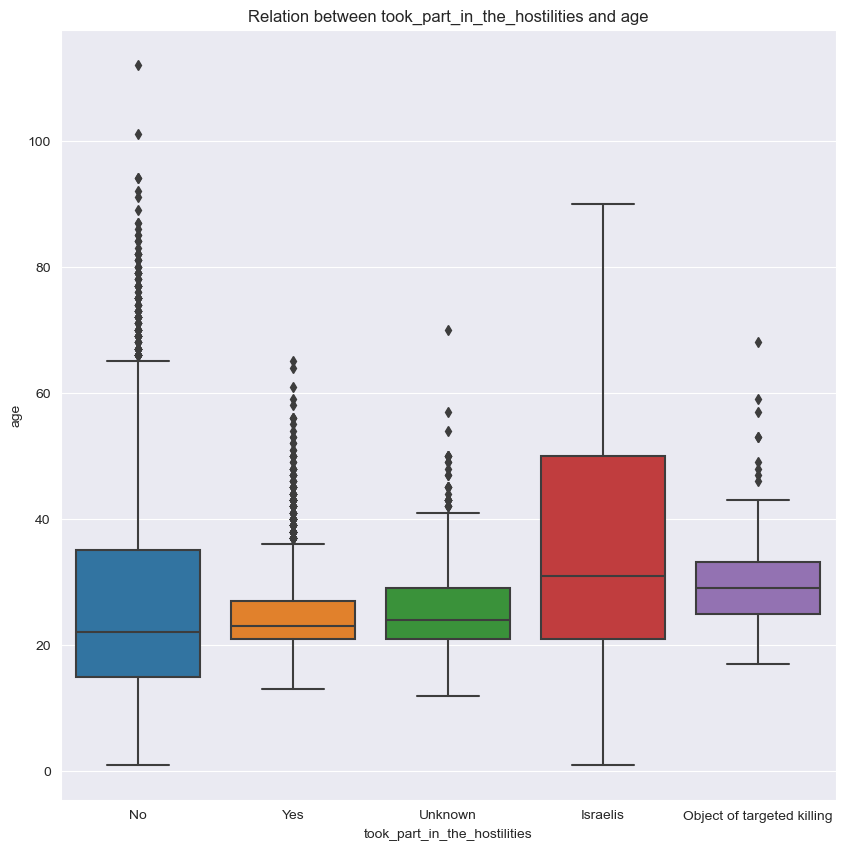

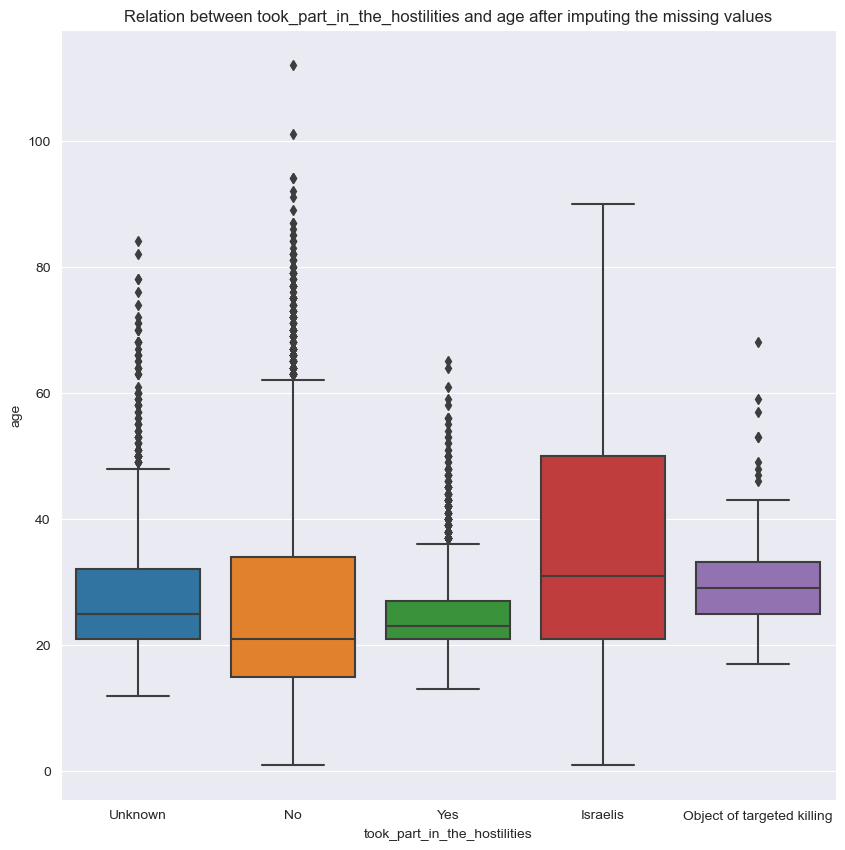

In [374]:
# Missing value handling for 'took_part_in_the_hostilities' column

# Before the imputation of missing values in the 'took_part_in_the_hostilities' column
plt.figure(figsize=(10, 10))
sns.boxplot(data=df, x='took_part_in_the_hostilities', y='age')
plt.title('Relation between took_part_in_the_hostilities and age')
plt.xlabel('took_part_in_the_hostilities')
plt.ylabel('age')
plt.show()
 
# Impute the missing values by No for the rows where the age is less than 18
df.loc[((df['took_part_in_the_hostilities'].isnull()) & (df['age'] < 18)), 'took_part_in_the_hostilities'] = 'No'
# Impute the missing values by Unknown for the other rows where the took_part_in_the_hostilities is null
df.loc[df['took_part_in_the_hostilities'].isnull(), 'took_part_in_the_hostilities'] = 'Unknown'

# After the imputation of missing values int the 'took_part_in_the_hostilities' column
plt.figure(figsize=(10, 10))
sns.boxplot(data=df, x='took_part_in_the_hostilities', y='age')
plt.title('Relation between took_part_in_the_hostilities and age after imputing the missing values')
plt.xlabel('took_part_in_the_hostilities')
plt.ylabel('age')
plt.show()

In [375]:
# Missing value handling for the 'place_of_residence' column

# Show the rows where place of residence is null
display(df[df['place_of_residence'].isnull()])

# impute place of residence with event_location
df.loc[df['place_of_residence'].isnull(), 'place_of_residence'] = df['event_location']

# impute place of residence district with event_location_district
df.loc[df['place_of_residence_district'].isnull(), 'place_of_residence_district'] = df['event_location_district']

display(df[df['place_of_residence'].isnull()]) # No missing values

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
175,Ilan Ganeles,2023-02-27,26,Israeli,Jericho,Jericho,West Bank,2023-02-27,M,Unknown,NaN,NaN,gunfire,live ammunition,Palestinian civilians,Shot and killed by Palestinians in a drive-by ...
952,Tamar Kaduri,2019-01-10,64,Israeli,Talpiot (East),East Jerusalem,West Bank,2019-01-10,F,Unknown,NaN,NaN,stabbing,knife,Palestinian civilians,Stabbed to death along with her husband by a P...
1576,'Abd al-Majid Majdi 'Abd al-Majid al-Wahidi,2015-10-09,18,Palestinian,Gaza City,Gaza,Gaza Strip,2015-10-09,M,Yes,NaN,NaN,gunfire,live ammunition,Israeli security forces,Killed after sustaining a gunshot wound to the...
1644,Karen Jemima Musquera,2014-10-22,22,Israeli,East Jerusalem,East Jerusalem,West Bank,2014-10-26,F,Unknown,NaN,NaN,hit by a vehicle,NaN,Palestinian civilians,Injured in a car attack at the light rail stat...
3254,Sha'ban Suliman a-Dahduh,2014-07-21,35,Palestinian,Gaza City,Gaza,Gaza Strip,2014-07-21,M,Yes,NaN,NaN,gunfire,NaN,Israeli security forces,Killed together with 10 members of the Kilani ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10848,Michal Mor,2001-11-27,26,Israeli,Afula,Israel,Israel,2001-11-27,F,Israelis,NaN,NaN,gunfire,NaN,Palestinian civilians,Killed in an attack near the central bus station.
10893,Smadar Levy,2001-10-28,23,Israeli,Hadera,Israel,Israel,2001-10-28,F,Israelis,NaN,NaN,gunfire,NaN,Palestinian civilians,Killed by indiscriminate Palestinian police gu...
11014,Ronen Landau,2001-07-26,17,Israeli,al-Jib,al-Quds,West Bank,2001-07-26,M,Israelis,NaN,NaN,gunfire,live ammunition,Palestinian civilians,Killed while driving in his car.
11089,Binyamin Ze'ev Kahane,2000-12-31,34,Israeli,Ofra,Ramallah and al-Bira,West Bank,2000-12-31,M,Israelis,NaN,NaN,gunfire,NaN,Palestinian civilians,Killed while driving in his car.


,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes


In [376]:
# Missing value handling for 'ammunition' column Part 1 (using Regex)

# Extract information about the type of ammunition from the 'notes' column which contains textual data.
null_ammunition_df = df[df['ammunition'].isnull() & df['notes'].notnull()]

shot_pattern = r'Shot|Fatally shot|(H|h)it in the head|fire exchange|(K|k)illed (with|in|at|together|while|along)'
vehicle_pattern = r'(R|r)un over|(R|r)amm(ed)?'
axe_pattern = r'(A|a)xe'
stabbing_pattern = r'(S|s)tabbed'
bomb_pattern = r'(B|b)omb(ed)?|bombing of'
for index, row in null_ammunition_df.iterrows():
    matches1 = re.findall(shot_pattern, row['notes'])
    matches2 = re.findall(vehicle_pattern, row['notes'])
    matches3 = re.findall(axe_pattern, row['notes'])
    matches4 = re.findall(stabbing_pattern, row['notes'])
    matches5 = re.findall(bomb_pattern, row['notes'])
    if len(matches1) != 0:
        null_ammunition_df.at[index, 'ammunition'] = "live ammunition"
    elif len(matches2) != 0:
        null_ammunition_df.at[index, 'ammunition'] = "vehicle"
    elif len(matches3) != 0:
        null_ammunition_df.at[index, 'ammunition'] = "axe"
    elif len(matches4) != 0:
        null_ammunition_df.at[index, 'ammunition'] = "knife"
    elif len(matches5) != 0:
        null_ammunition_df.at[index, 'ammunition'] = "bomb"

# Merge null_ammunition_df back into the original df
df.update(null_ammunition_df)

# Data Fixing
filtered_rows = df[(df['ammunition'] == 'live ammunition') ]
row = filtered_rows[filtered_rows['type_of_injury'] != 'gunfire' ]
erroneous_data = filtered_rows[filtered_rows['type_of_injury'] != 'gunfire']
df.loc[df['ammunition'] == 'live ammunition', 'type_of_injury'] = 'gunfire'

# Missing value imputation for 'ammunition' column Part 2
df.loc[(df['ammunition'].isnull() & (df['type_of_injury'] == 'gunfire')),'ammunition' ] = 'live ammunition'
df.loc[(df['ammunition'].isnull() & (df['type_of_injury'] == 'stabbing')),'ammunition' ] = 'knife'
df.loc[(df['ammunition'].isnull() & (df['type_of_injury'] == 'stones throwing')),'ammunition' ] = 'rock'

df.isnull().sum()

name                              0
date_of_event                     0
age                               0
citizenship                       0
event_location                    0
event_location_district           0
event_location_region             0
date_of_death                     0
gender                           20
took_part_in_the_hostilities      0
place_of_residence                0
place_of_residence_district       0
type_of_injury                  164
ammunition                      217
killed_by                         0
notes                           280
dtype: int64

In [377]:
# Dropping rows contains missing values
df.dropna(inplace=True)
df.isnull().sum()

name                            0
date_of_event                   0
age                             0
citizenship                     0
event_location                  0
event_location_district         0
event_location_region           0
date_of_death                   0
gender                          0
took_part_in_the_hostilities    0
place_of_residence              0
place_of_residence_district     0
type_of_injury                  0
ammunition                      0
killed_by                       0
notes                           0
dtype: int64

# Outlier Handling
Detection method: IQR Method
**Note:** Outliers will not be handled since each of them corresponds to an individual, they are not erroneous.

In [378]:
# 'age' is the only numerical column in this dataset

Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
outliers = (df['age'] < (Q1 - 3 * IQR)) | (df['age'] > (Q3 + 3 * IQR))

print(df['age'][outliers].count())

187


In [379]:
# Outlier Handling for the 'citizenship' column

# Removing extremely rare categories
print(df['citizenship'].value_counts())
# There are only 1 American and 2 Jordanian in the dataset.

df = df[df['citizenship'].isin(['Palestinian', 'Israeli'])]

citizenship
Palestinian    9633
Israeli         999
Jordanian         2
American          1
Name: count, dtype: int64


# Step 3: Exploratory Data Analysis (EDA) 
In this step, we will explore, present some of the critical statistics about the data that has been collected and preprocessed. Later on, we will also carry on k-Means clustering to better understand the nature of the data.

# Distribution of Attributes
We will visualize the distribution of the attributes in this section.
It is important to understand the distribution of the attributes to better understand the data.

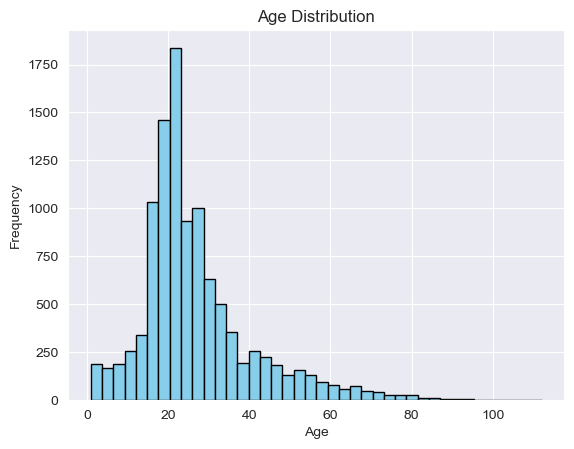

In [380]:
# Distribution of the 'age' variable
plt.hist(df['age'], bins=40, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Most of the deaths reported are young.
### According to reports, young people and children were targeted more than middle-aged and older people

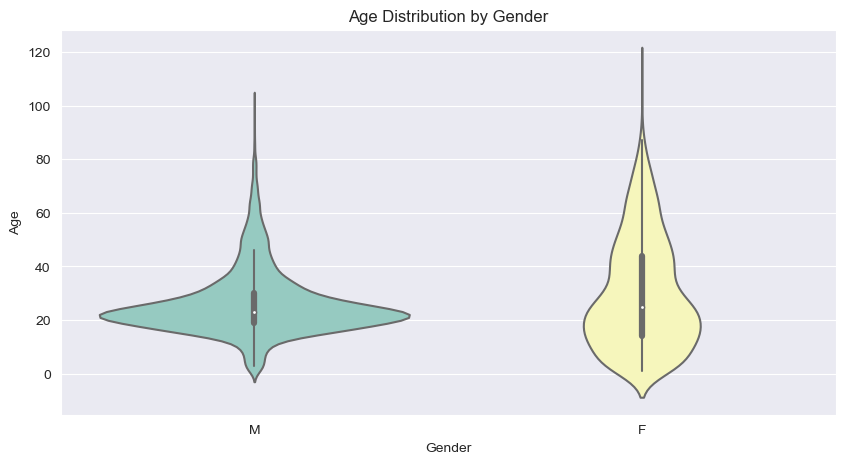

In [403]:
# Violin plot of age distribution by gender
plt.figure(figsize=(10, 5))
sns.violinplot(data=df, x='gender', y='age', palette='Set3')
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

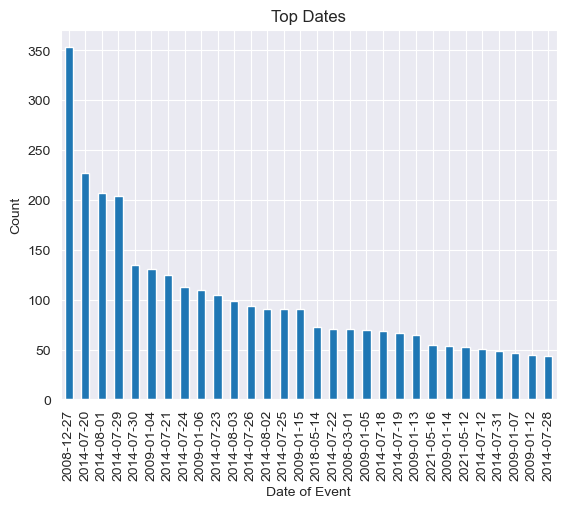

In [381]:
# Distribution of 'date_of_event' variable
# This distribution analysis gives information about any important event that happened in those dates
top_categories = df['date_of_event'].value_counts().nlargest(30)  # Adjust 10 based on your preference
top_categories.plot(kind='bar')
plt.title('Top Dates')
plt.xlabel('Date of Event')
plt.ylabel('Count')
plt.show()

### Mass deaths were common in incidents.

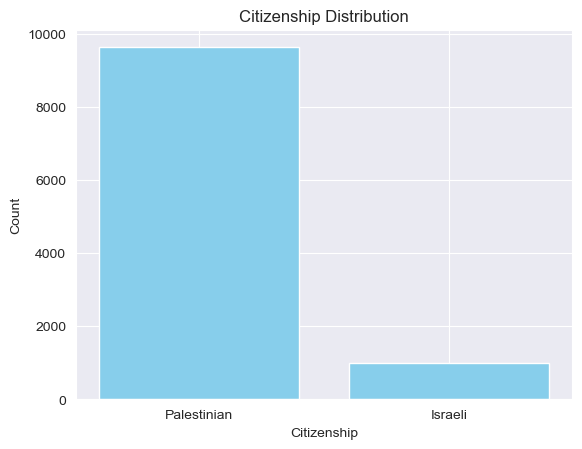

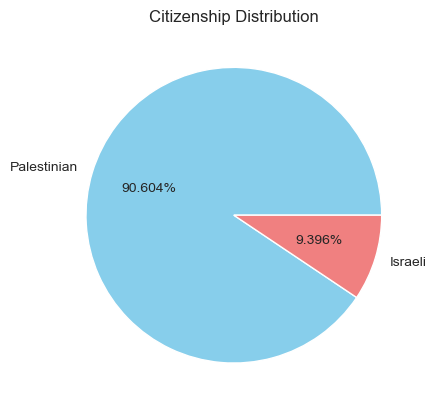

In [382]:
# Distribution of 'citizenship' variable
citizenship_counts = df['citizenship'].value_counts()

# Plot a bar chart
plt.bar(citizenship_counts.index, citizenship_counts.values, color='skyblue')
plt.title('Citizenship Distribution')
plt.xlabel('Citizenship')
plt.ylabel('Count')
plt.show()

# Plot a pie chart
plt.pie(citizenship_counts, labels=citizenship_counts.index, autopct='%1.3f%%', colors=['skyblue', 'lightcoral', 'lightgreen',
                                                                                        'orange', 'lightpink'])
plt.title('Citizenship Distribution')
plt.show()

#### As seen in the bar chart and pie graph above, the Palestinians are being killed more than Israelis. This shows that Israeli "civilians" and "security forces" are seriously targeting Palestinians and have been doing so for a long time.

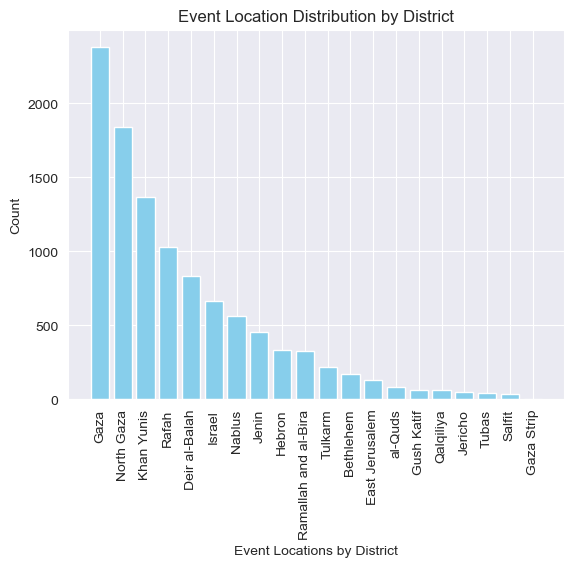

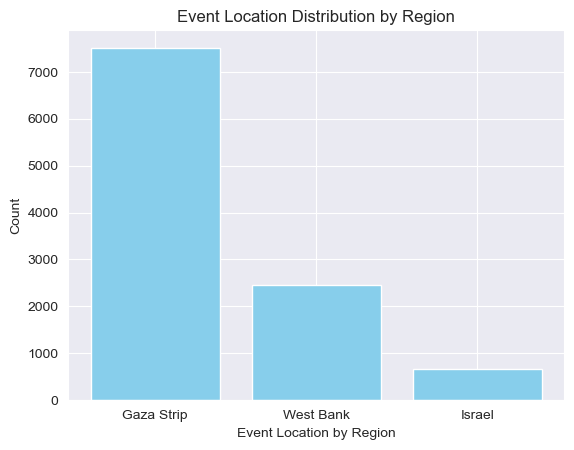

In [383]:
# Distribution of 'event_location_district' and 'event_location_region' variables
event_location_district_counts = df['event_location_district'].value_counts()
event_location_region_counts = df['event_location_region'].value_counts()

# Plot a bar chart for event_location_district
plt.bar(event_location_district_counts.index, event_location_district_counts.values, color='skyblue')
# Rotate the x-axis labels vertically
plt.xticks(rotation='vertical')
plt.title('Event Location Distribution by District')
plt.xlabel('Event Locations by District')
plt.ylabel('Count')
plt.show()

# Plot a bar chart for event_location_region
plt.bar(event_location_region_counts.index, event_location_region_counts.values, color='skyblue')
plt.title('Event Location Distribution by Region')
plt.xlabel('Event Location by Region')
plt.ylabel('Count')
plt.show()

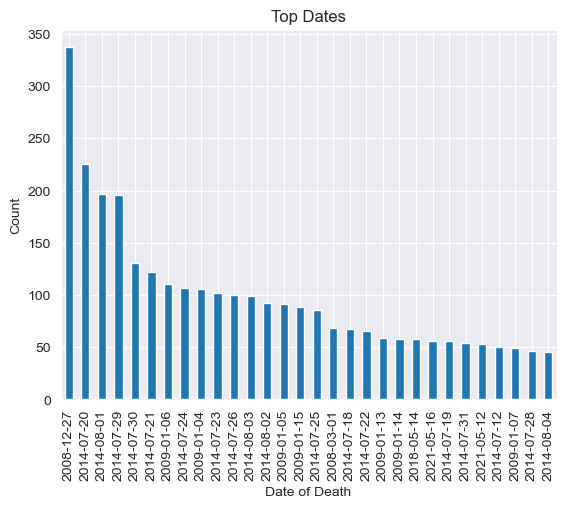

In [384]:
# Distribution of 'date_of_death' variable
# This distribution analysis gives information about any important event that happened in those dates
top_categories = df['date_of_death'].value_counts().nlargest(30)  # Adjust 10 based on your preference
top_categories.plot(kind='bar')
plt.title('Top Dates')
plt.xlabel('Date of Death')
plt.ylabel('Count')
plt.show()

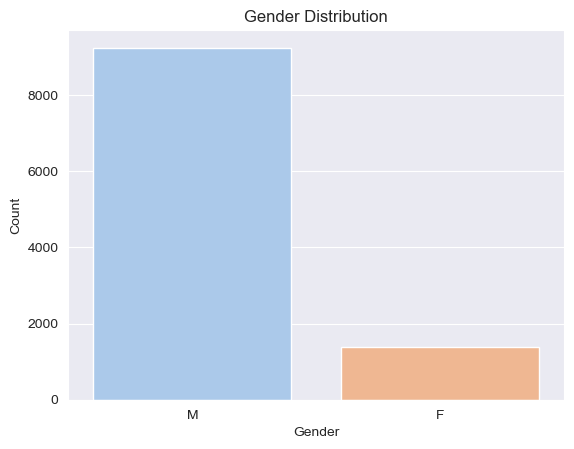

In [385]:
# Distribution of 'gender' variable
sns.countplot(x='gender', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#### In this very long term conflict, males are affected more than females as seen in the statistics.

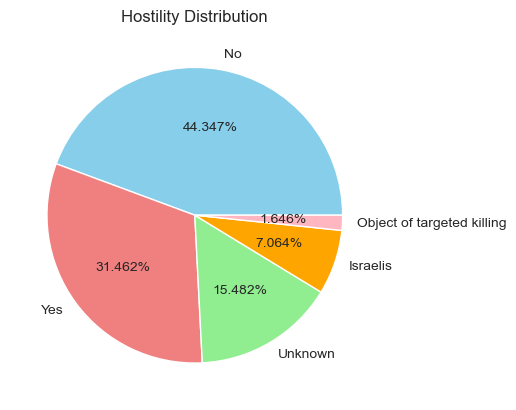

In [386]:
# Distribution of 'took_part_in_the_hostilities'
took_part_in_the_hostilities_count  = df['took_part_in_the_hostilities'].value_counts()
plt.pie(took_part_in_the_hostilities_count, labels=took_part_in_the_hostilities_count.index, autopct='%1.3f%%',
        colors=['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightpink'])
plt.title('Hostility Distribution')
plt.show()

#### The position of the vast majority of the dead is unknown, but among those who are known, it is clear that the majority are innocent, hence the deaths of civilians who were not resisting in the face of disproportionate force. The number of people killed increases without changing the proportion of innocents in areas of resistance

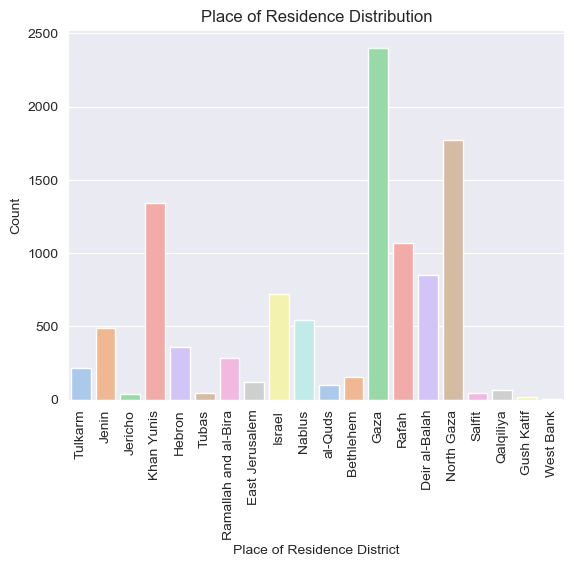

In [387]:
# Distribution of 'place_of_residence_district' variable    
sns.countplot(x='place_of_residence_district', data=df, palette='pastel')
plt.xticks(rotation='vertical')
plt.title('Place of Residence Distribution')
plt.xlabel('Place of Residence District')
plt.ylabel('Count')
plt.show()

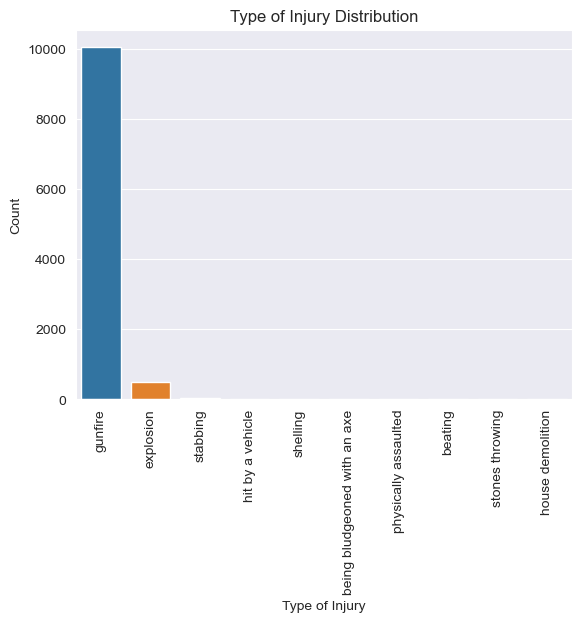

In [388]:
# Distribution of 'type_of_injury' variable
sns.countplot(x='type_of_injury', data=df)
plt.xticks(rotation='vertical')
plt.title('Type of Injury Distribution')
plt.xlabel('Type of Injury')
plt.ylabel('Count')
plt.show()

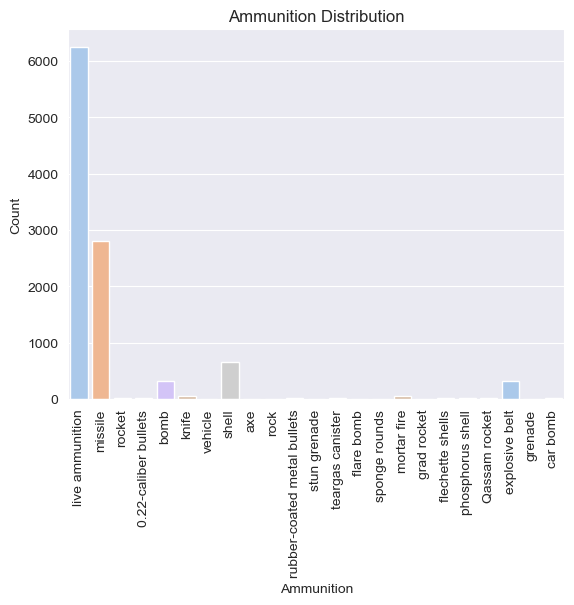

In [389]:
# Distribution of 'ammunition' variable
sns.countplot(x='ammunition', data=df, palette='pastel')
plt.xticks(rotation='vertical')
plt.title('Ammunition Distribution')
plt.xlabel('Ammunition')
plt.ylabel('Count')
plt.show()

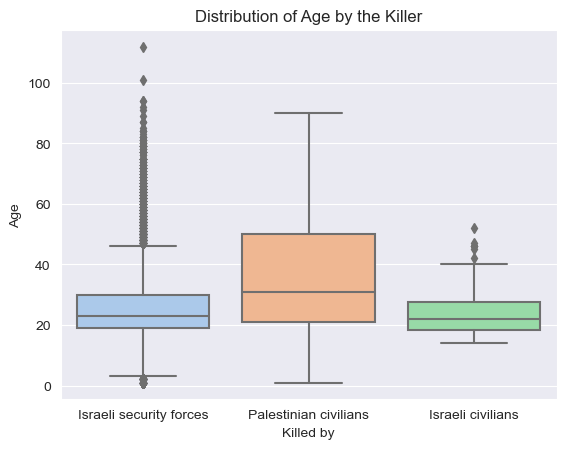

In [390]:
# Distribution of 'killed_by' variable
sns.boxplot(x='killed_by', y='age', data=df, palette='pastel')
plt.title('Distribution of Age by the Killer')
plt.xlabel('Killed by')
plt.ylabel('Age')
plt.show()

## Visualization of the frequencies in the map
### Some libraries must be downloaded 
pip install geopandas

In [391]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Convert the data to a DataFrame
url1 = 'https://drive.google.com/file/d/1IL44Hgw-71Y_8_0tJXDcQBwHQYcC2fDD/view?usp=sharing'
path1 = 'https://drive.google.com/uc?export=download&id='+url1.split('/')[-2]
osm_df = pd.read_csv(path1)
display(osm_df.head())

,event_location_district,lat,lon
0,Jenin,32.468789,35.296756
1,Tulkarm,32.319090,35.047568
2,Jericho,31.870756,35.439375
3,Gaza,31.500688,34.453011
4,Hebron,31.525126,35.102063


event_location_district
Gaza                    2380
North Gaza              1840
Khan Yunis              1364
Rafah                   1031
Deir al-Balah            832
Israel                   665
Nablus                   561
Jenin                    451
Hebron                   332
Ramallah and al-Bira     326
Tulkarm                  217
Bethlehem                172
East Jerusalem           128
al-Quds                   83
Gush Katif                64
Qalqiliya                 60
Jericho                   48
Tubas                     41
Salfit                    33
Gaza Strip                 4
Name: count, dtype: int64


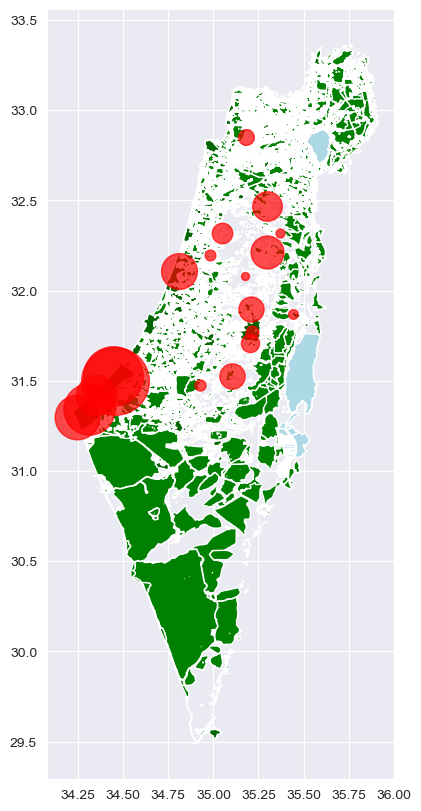

In [392]:
from shapely.geometry import Point
# Convert to a GeoDataFrame
geometry = [Point(xy) for xy in zip(osm_df['lon'], osm_df['lat'])]
osm_gdf = gpd.GeoDataFrame(osm_df, geometry=geometry)

palestine_israel = gpd.read_file("gis_osm_landuse_a_free_1.shx")
palestine_israel2 = gpd.read_file("gis_osm_natural_a_free_1.shx")
palestine_israel5 = gpd.read_file("gis_osm_transport_a_free_1.shx")
palestine_israel6 = gpd.read_file("gis_osm_water_a_free_1.shx")
palestine_israel7 = gpd.read_file("gis_osm_places_a_free_1.shx")

# Calculate the frequencies of the given district regions
district_frequencies = df['event_location_district'].value_counts()

print(district_frequencies)

# Plot the GeoDataFrame with the map as the background

fig, ax = plt.subplots(figsize=(10, 10))

palestine_israel6.plot(ax=ax , color='lightblue')
palestine_israel.plot(ax=ax, color='green')
palestine_israel2.plot(ax=ax , color='green')
palestine_israel5.plot(ax=ax , color='green')
palestine_israel7.plot(ax=ax , color='darkgreen')
# Plot the bubble chart
for district, frequency in district_frequencies.items():
    district_geometry = osm_gdf[osm_gdf['event_location_district'] == district]
    district_geometry.plot(ax=ax, color='red', markersize=frequency,alpha=0.7, label=district )

plt.show()

### Map Visualization Report
#### * Most of the deaths are reported from Gaza territory.
#### * While there are significant numbers of deaths in the West Bank, the death concentration in the Gaza Strip is extremely high. This is an unacceptable level of massacre of a large population squeezed into a small area
#### Source: 

# Clustering Analysis
Clustering Method: K-Means Method

In [393]:
# Encoding Categorical Columns (Converting Categorical Values into Numerical Values)

clustering_df = pd.DataFrame() # dataframe to store the columns that will be used in clustering analysis
categorical_columns = df.select_dtypes(include=['object']).columns

# Dropping unnecessary columns
categorical_columns = [col for col in categorical_columns if col != 'name' and col != 'notes']
clustering_columns = categorical_columns.copy()
clustering_columns.remove('date_of_death')
clustering_columns.remove('date_of_event') # Will be encoded later on
clustering_columns.remove('event_location')
clustering_columns.remove('place_of_residence')

for col in clustering_columns:
    if col == 'type_of_injury': # 'type_of_injury' column will remain unchanged(unencoded)
        clustering_df[col] = df[col]
        continue
    # One-Hot Encoding
    one_hot_encoded = pd.get_dummies(df[col], prefix=col)
    
    # Concatenate the one-hot encoded DataFrame with the original DataFrame
    clustering_df = pd.concat([clustering_df, one_hot_encoded], axis=1)
        
# Concatenate the age column
clustering_df['age'] = df['age']
clustering_df.head()

,citizenship_Israeli,citizenship_Palestinian,event_location_district_Bethlehem,event_location_district_Deir al-Balah,event_location_district_East Jerusalem,event_location_district_Gaza,event_location_district_Gaza Strip,event_location_district_Gush Katif,event_location_district_Hebron,event_location_district_Israel,...,ammunition_rubber-coated metal bullets,ammunition_shell,ammunition_sponge rounds,ammunition_stun grenade,ammunition_teargas canister,ammunition_vehicle,killed_by_Israeli civilians,killed_by_Israeli security forces,killed_by_Palestinian civilians,age
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,32
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,21
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,16
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,19
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,15


In [394]:
# Date Type Variables Encoding (date_of_event)

clustering_df['date_of_event'] = pd.to_datetime(df['date_of_event'])

# Define the number of groups to be created
num_groups = 12*23  # Adjust to the desired number of unique values

# Group the dates into bins and assign ordinal values to each group
clustering_df['ordinal_encoded_date_of_event'] = clustering_df.groupby(pd.Grouper(key='date_of_event', freq='M')).ngroup() + 1

# Map the groups to a specific range with bins
clustering_df['ordinal_encoded_date_of_event'] = pd.cut(clustering_df['ordinal_encoded_date_of_event'], bins=num_groups, labels=False)

clustering_df.drop('date_of_event', axis=1, inplace=True)

# Map the ordinal values to a specific range
clustering_df['ordinal_encoded_date_of_event'] = clustering_df['ordinal_encoded_date_of_event'].rank(method='max').astype(int)

In [395]:
# Feature Scaling (Standardization)
# 'age' is the only numerical variable in this dataset
standard_scaler = StandardScaler()
clustering_df['age'] = standard_scaler.fit_transform(clustering_df['age'].values.reshape(-1, 1))
clustering_df['age'].head()

clustering_df.head()

,citizenship_Israeli,citizenship_Palestinian,event_location_district_Bethlehem,event_location_district_Deir al-Balah,event_location_district_East Jerusalem,event_location_district_Gaza,event_location_district_Gaza Strip,event_location_district_Gush Katif,event_location_district_Hebron,event_location_district_Israel,...,ammunition_shell,ammunition_sponge rounds,ammunition_stun grenade,ammunition_teargas canister,ammunition_vehicle,killed_by_Israeli civilians,killed_by_Israeli security forces,killed_by_Palestinian civilians,age,ordinal_encoded_date_of_event
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,0.390304,10632
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,-0.412052,10632
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,-0.776759,10632
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,-0.557935,10632
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,-0.849700,10632


In [396]:
classification_df = clustering_df.copy()

# drop the target variable from the clustering_df
clustering_df.drop('type_of_injury', axis=1, inplace=True)

In [397]:
# Applying PCA to reduce the dimensionality of the dataset
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_df = pca.fit_transform(clustering_df)
pca_df = pd.DataFrame(data=pca_df, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-5092.753805,0.656013
1,-5092.753813,-0.095479
2,-5092.753823,-0.544906
3,-5092.753826,-0.234072
4,-5092.753823,-0.613224


#### PCA(Principal Component Analysis) is applied to the data in order to reduce the dimesions in the data. PCA ensures that the most of the variance of the variables are represented by less amount of dimesions. This makes the computation time less and make the data more readable and interpretable.

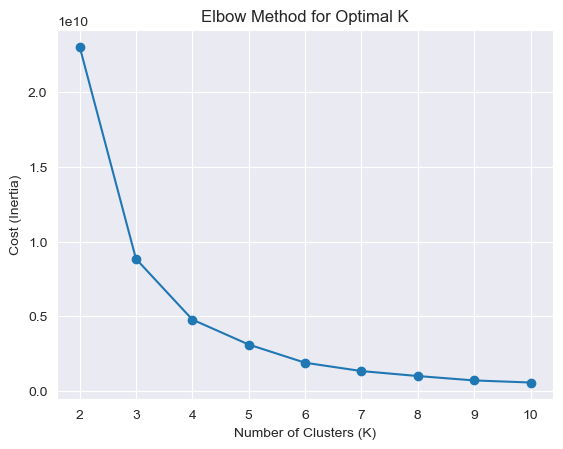

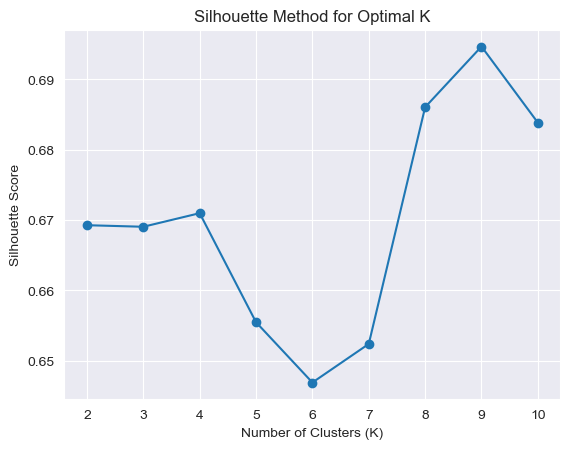

Best k: 9


In [398]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Apply k-Means for a range of values of k
k_values = range(2, 11)
silhouette_scores = []
cost_inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    preds = kmeans.fit_predict(pca_df)
    score = silhouette_score(pca_df, preds, metric='euclidean') # silhouette score
    silhouette_scores.append(score) 
    cost_inertia.append(kmeans.inertia_) # inertia 

# Plot the Elbow Method Graph
plt.plot(k_values, cost_inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Cost (Inertia)')
plt.show()

# Find the best k (highest silhouette score)
best_k = k_values[np.argmax(silhouette_scores)]

# Plot the Silhouette Method Graph
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

print('Best k:', best_k)

#### According to the clustering analysis there are 9 clusters as optimal. Conducting a k-means clustering analysis on the feature-rich dataset, we aim to discern inherent groupings and patterns within the data. Employing elbow method, we seek to determine the optimal number of clusters for a nuanced understanding of the underlying structure, paving the way for more targeted insights and informed decision-making in subsequent analytical endeavors.

# Step 4: Predictive Modelling 

# Decision Tree Classifier

In [399]:
# Target Variable: Ammunition

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

'''features = clustering_df.columns
features = features.drop('type_of_injury')
X = clustering_df[features]
y = clustering_df['type_of_injury']'''

# Features and target variable
X = classification_df.drop('type_of_injury', axis=1)
y = classification_df['type_of_injury']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

from sklearn.metrics import classification_report

decision_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
decision_tree = decision_tree.fit(X_train,y_train)

y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

                              precision    recall  f1-score   support

being bludgeoned with an axe       0.00      0.00      0.00         1
                   explosion       0.97      0.94      0.95       157
                     gunfire       0.99      1.00      1.00      3005
            hit by a vehicle       0.00      0.00      0.00         1
                    shelling       0.75      0.43      0.55         7
                    stabbing       0.85      1.00      0.92        17
             stones throwing       0.00      0.00      0.00         2

                    accuracy                           0.99      3190
                   macro avg       0.51      0.48      0.49      3190
                weighted avg       0.99      0.99      0.99      3190

Accuracy: 0.9918495297805643


#### 

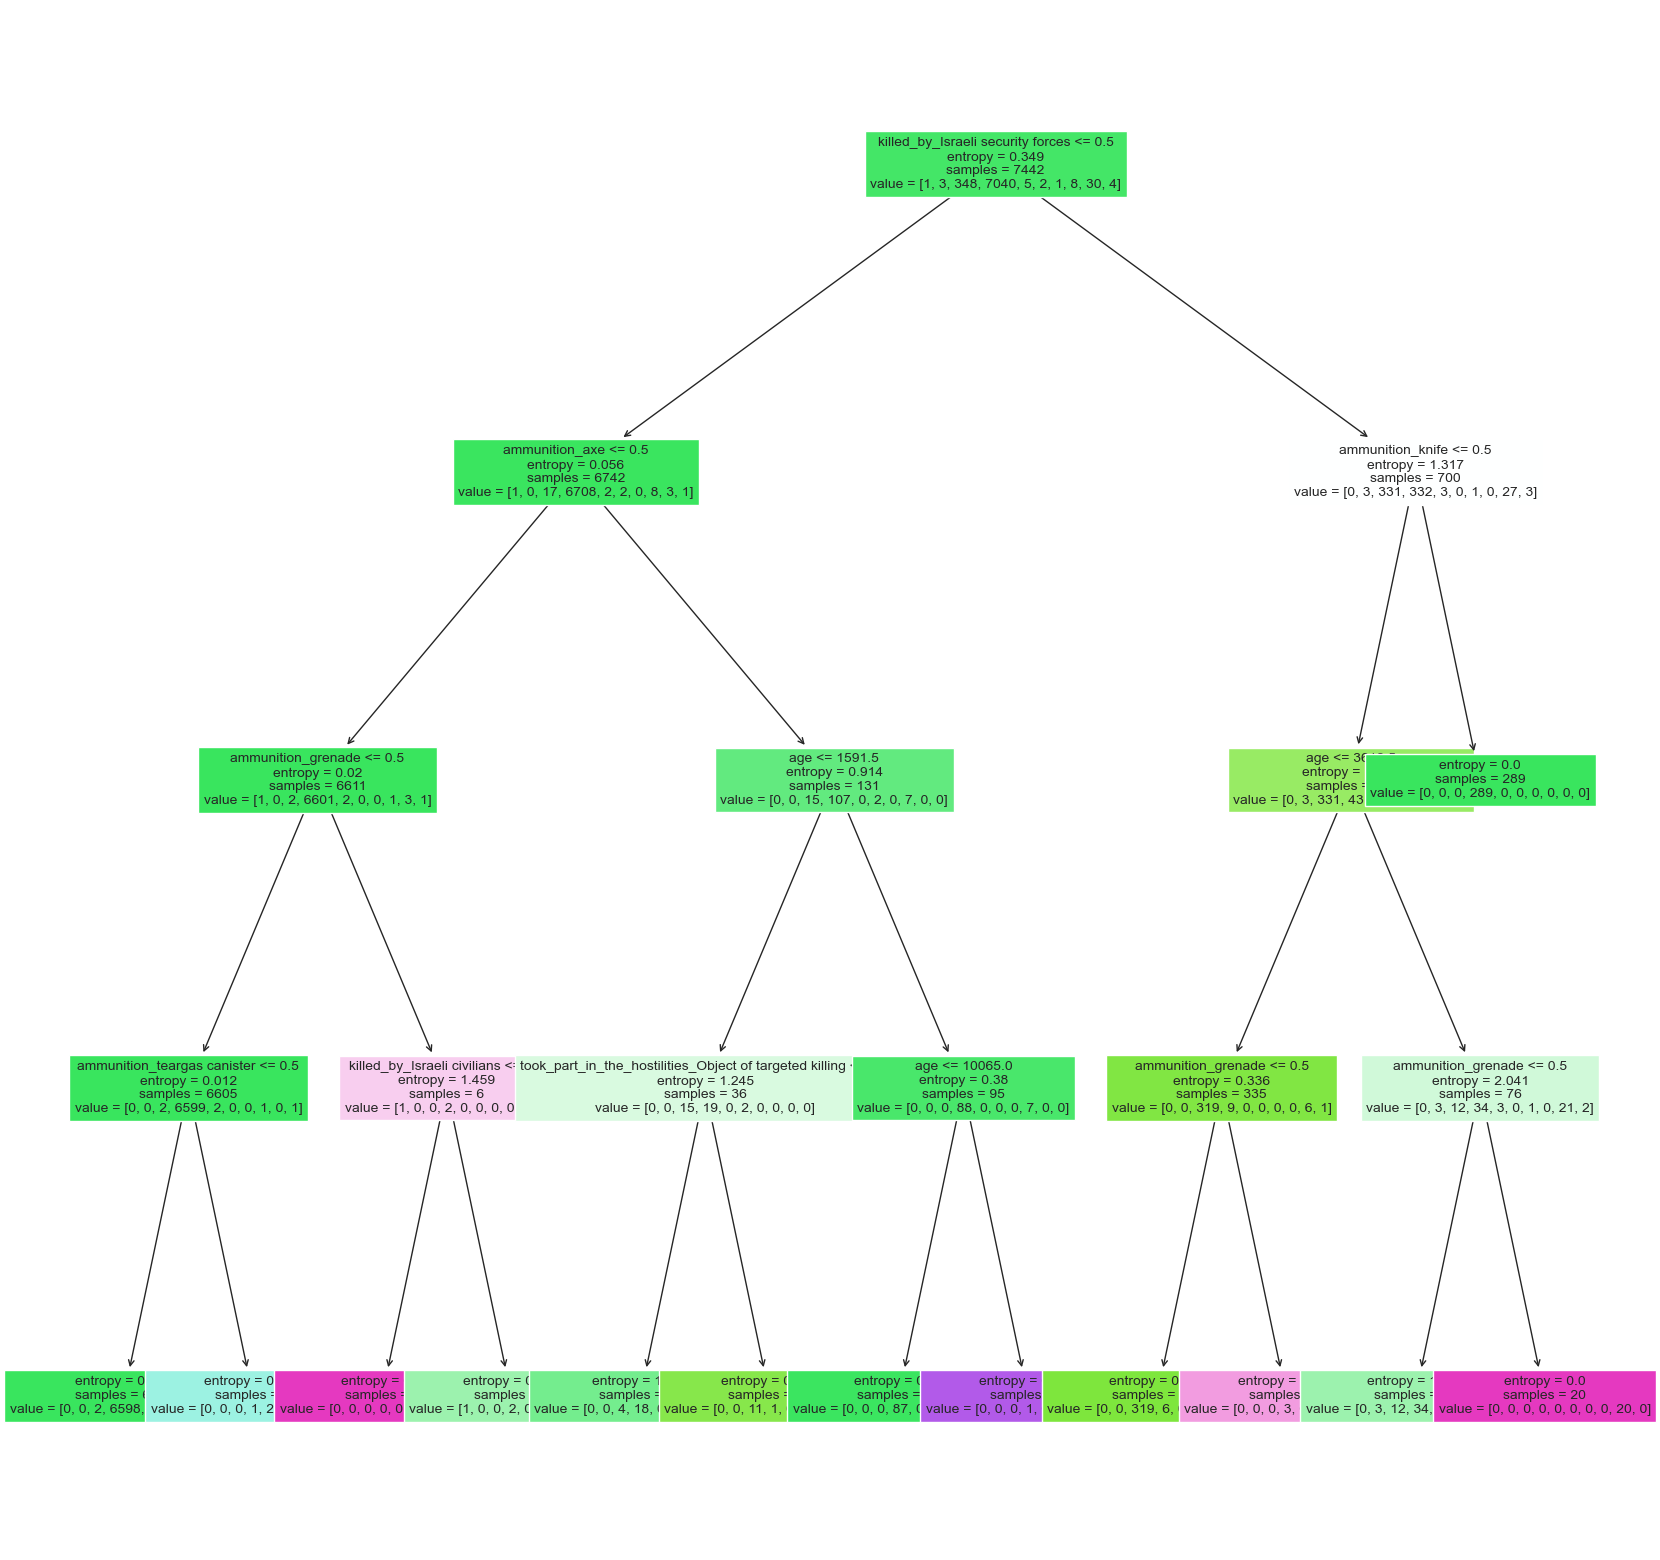

In [400]:
import sklearn
plt.figure(figsize=(20,20))
sklearn.tree.plot_tree(decision_tree, feature_names=classification_df.columns, filled=True, fontsize=10)

plt.show()

#### Efficient Information Gain Calculation: Decision trees calculate the information gain by splitting the dataset based on a feature. The information gain is a measure of the reduction in entropy (randomness) achieved by partitioning the samples according to the given feature. In the case of binary features, the calculation of information gain becomes simpler and more efficient, leading to a more accurate model.

#### Simplified Model Interpretability: Binary features simplify the interpretation of decision trees. Each decision in the tree corresponds to a binary test of a feature, which makes the model easier to understand and interpret. This is particularly beneficial in fields where interpretability is crucial, such as healthcare or finance.

#### Handling Missing Values: Decision trees can handle missing values effectively. In the case of binary features, missing values can be treated as a separate category, allowing the model to still learn from the available data.

#### Reduced Overfitting: With many binary features, decision trees are less likely to overfit the training data. This is because each binary feature provides a clear rule for splitting the data, reducing the complexity of the model and helping it generalize better to unseen data.

#### So, the presence of many binary features in the data can enhance the performance of decision trees by simplifying the decision-making process, improving model interpretability, handling missing values effectively, and reducing overfitting.

# Logistic Regression Classifier

In [401]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression

# Target Variable: Type of Injury

# Features and target variable
X = classification_df.drop('type_of_injury', axis=1)
y = classification_df['type_of_injury']

# Binarize the labels for each class
y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logreg_model = LogisticRegression()

# Perform cross-validation
cv_scores = cross_val_score(logreg_model, X, y, cv=5)  # 5-fold cross-validation

# Perform cross-validation predictions
y_cv_pred = cross_val_predict(logreg_model, X, y, cv=5, method='predict_proba')[:, 1]

# Train the model on the training set
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)
y_pred_proba = logreg_model.predict_proba(X_test)

#### Implemented Logistic Regression for a classification task. Leveraging the sigmoid function, it transforms the combination of features into probability estimates. During training, the model optimizes parameters using gradient descent to minimize cross-entropy loss. Evaluation metrics such as accuracy and confusion matrix provide insights into its predictive performance. Ongoing exploration involves assessing feature importance and potential interactions to enhance model interpretability.

# Step 5: Model Evaluation and Visualizations 

# Logistic Regression Model Evaluation

In [402]:
# Performance Analysis

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
classification_report_str = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report_str)


Accuracy: 0.9722614010343207
Confusion Matrix:
[[   0    0    0    1    0    0    0]
 [   0    0    0    1    0    0    0]
 [   0    0   75   23    0    0    0]
 [   0    0   16 1993    0    0    0]
 [   0    0    0    2    0    0    0]
 [   0    0    0    5    0    0    0]
 [   0    0    1   10    0    0    0]]
Classification Report:
                              precision    recall  f1-score   support

                     beating       0.00      0.00      0.00         1
being bludgeoned with an axe       0.00      0.00      0.00         1
                   explosion       0.82      0.77      0.79        98
                     gunfire       0.98      0.99      0.99      2009
            hit by a vehicle       0.00      0.00      0.00         2
                    shelling       0.00      0.00      0.00         5
                    stabbing       0.00      0.00      0.00        11

                    accuracy                           0.97      2127
                   macro avg   

#### Logistic Regression's interpretability, efficiency with binary outcomes, probabilistic predictions, ability to handle collinearity, widespread acceptance, and robustness to outliers make it a suitable and advantageous choice for analyzing and understanding the disparities and injustices in fatalities within the Israeli-Palestinian conflict.

# Z-Report:

## Abstract:
#### This machine learning homework aims to shed light on the disparities and injustices within the Israeli-Palestinian conflict, specifically focusing on the recorded fatalities from 2000 to 2023. Utilizing a dataset comprising information on casualties, we employed various machine learning techniques to uncover patterns, trends, and potential injustices in the recorded data.

## Data Collection:
#### The dataset spans the period from 2000 to 2023, capturing fatalities on both sides of the conflict. Collected variables include demographics, locations, causes of death, and other relevant information.

## Methods:
#### Machine learning techniques were applied to discern patterns and trends within the data. Exploratory Data Analysis (EDA) provided an initial understanding, followed by clustering analysis, classification models, and statistical tests to quantify and qualify disparities.

## Results:
#### Preliminary EDA reveals temporal and spatial trends in fatalities. Clustering analysis exposes potential groupings, while classification models are employed to predict the likelihood of certain outcomes based on available features. Statistical tests are applied to identify significant differences in fatalities between Israelis and Palestinians.

## Discussion:
#### The findings aim to contribute to the ongoing discourse surrounding the Israeli-Palestinian conflict, providing a data-driven perspective on the disparities and injustices witnessed in recorded fatalities. Interpretation of results requires considering the broader context of the conflict, geopolitical events, and potential biases within the dataset.

## Conclusion:
#### This machine learning analysis provides an initial exploration into understanding disparities in fatalities between Israelis and Palestinians from 2000 to 2023. Further research and contextualization are essential to draw meaningful conclusions and contribute to a nuanced understanding of the Israeli-Palestinian conflict.

#### The reason we chose the target value as a cause of injury is to analyze the situation of those who killed the people who were killed in that area and to reveal whether it was really a "conflict" or genocide and how dangerous the power is in the hands of those who are financially funded, who cannot be prosecuted and who disproportionately commit crimes against humanity. Our dataset covers killings reported between 2000 and 2023. Despite a long period of non-resistance, we need to understand that the killings and repression that really exist and that the Palestinians are innocent. As a result, our study confirms these facts.

# FREE PALESTINE!